In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from gnuradio.digital import crc

import collections

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
crc16_ccitt_false = crc(16, 0x1021, 0xFFFF, 0x0, False, False)

def analysis(path):
    plt.title('Symbol Histogram')
    x = np.fromfile(path, 'float32').reshape(-1, 2048)
    frames = np.packbits((x >= 0).astype('uint8'), axis=1)
    
    plt.hist(x.ravel()[:1000000], bins=300)
    
    plt.figure(figsize=(7, 7))
    plt.imshow(frames, interpolation='none', aspect='auto', vmin=0)
    crc_ok = [crc16_ccitt_false.compute(frame) == 0 for frame in frames]
    print('CRC OK fraction:', np.average(crc_ok))

CRC OK fraction: 0.0


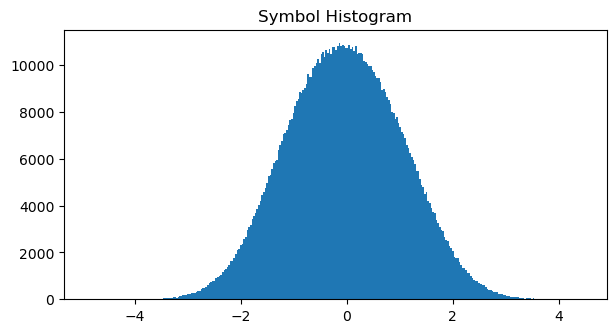

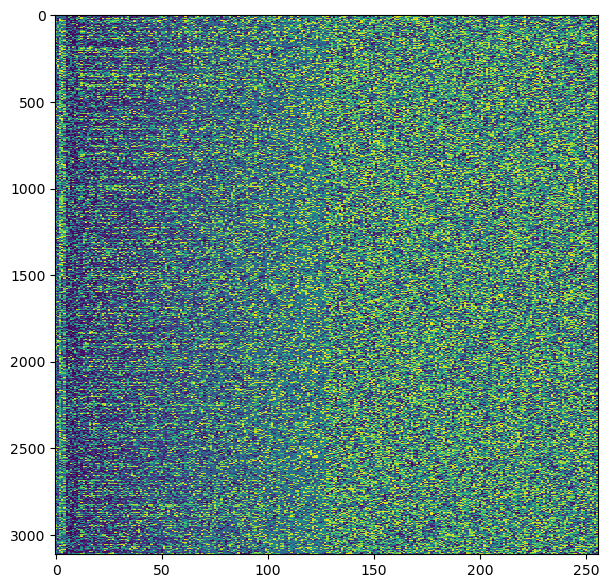

In [3]:
analysis('orion_2022_11_17_08_56_06_soft_pdus.f32') # LDPC

CRC OK fraction: 2.8559188919034698e-05


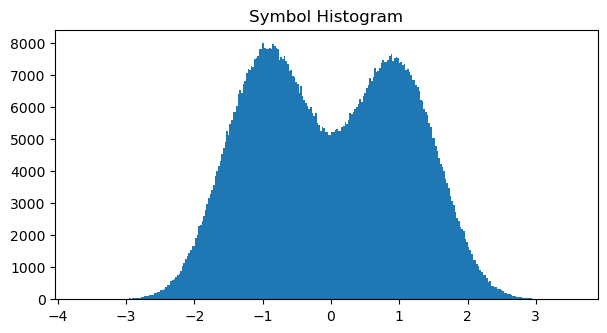

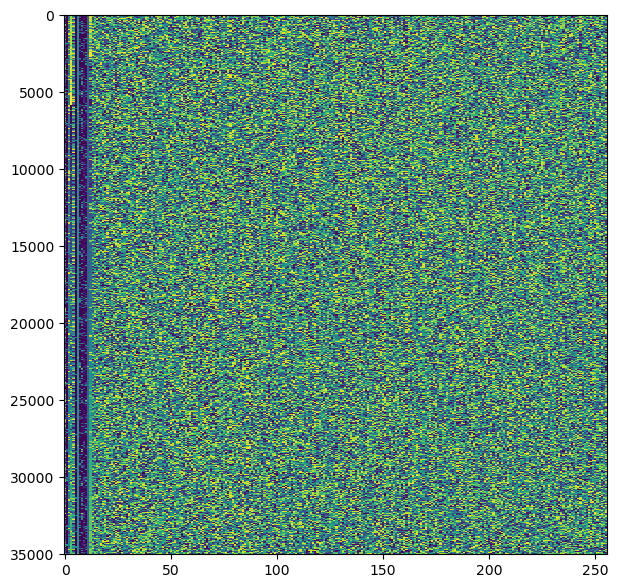

In [4]:
analysis('orion_2022_11_30_18_13_11_soft_pdus.f32') # uncoded

CRC OK fraction: 0.0


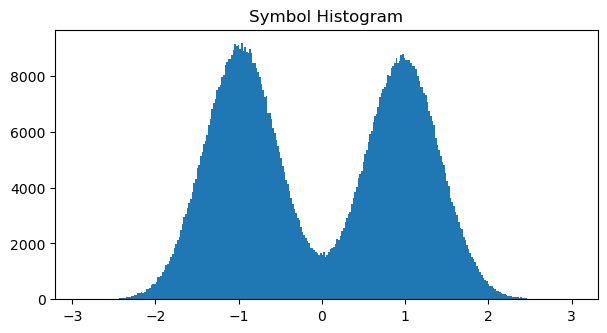

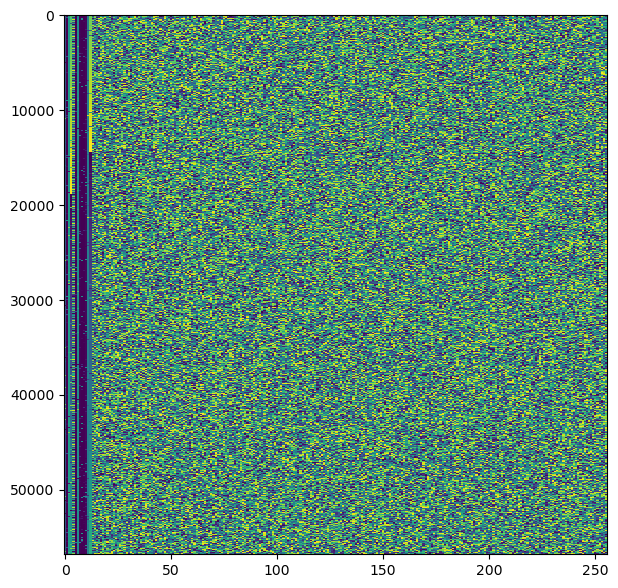

In [5]:
analysis('orion_2022_11_30_19_17_04_soft_pdus.f32') # uncoded

CRC OK fraction: 1.760098565519669e-05


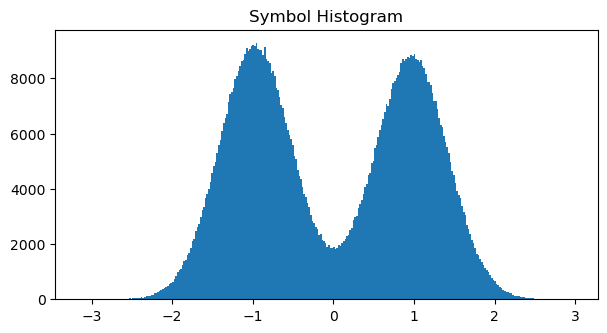

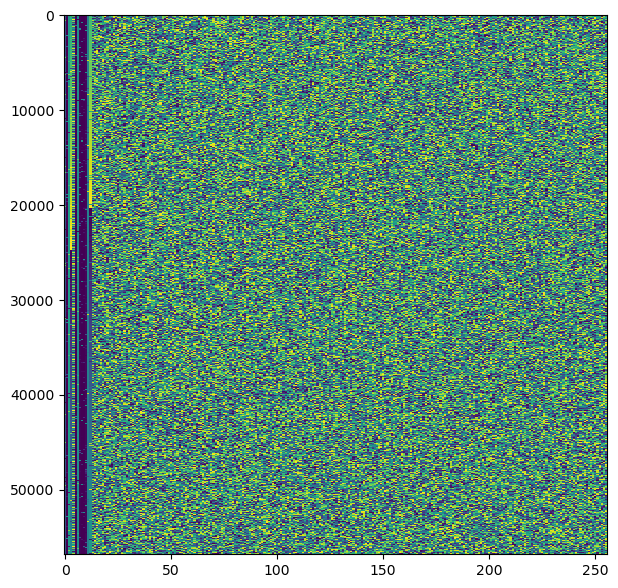

In [6]:
analysis('new/orion_2022_11_30_19_18_07_soft_pdus.f32') # uncoded

CRC OK fraction: 0.0


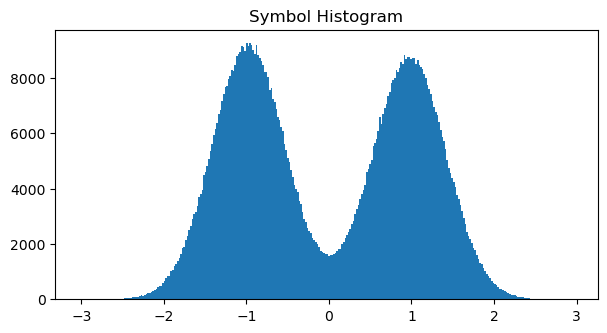

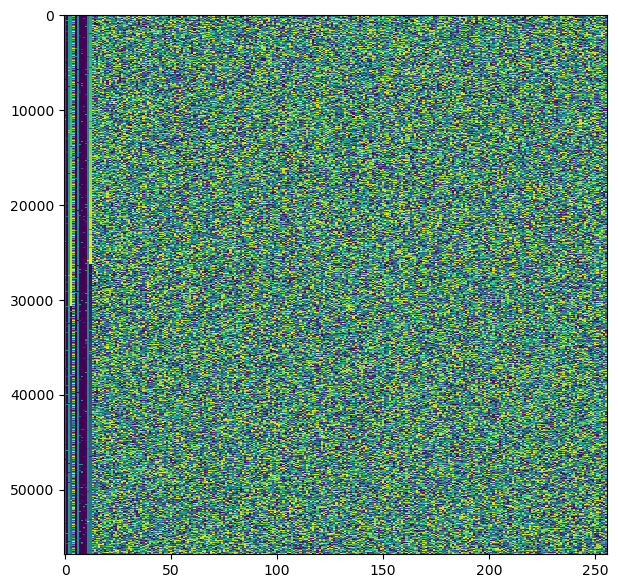

In [7]:
analysis('new/orion_2022_11_30_19_19_10_soft_pdus.f32') # uncoded

CRC OK fraction: 0.0


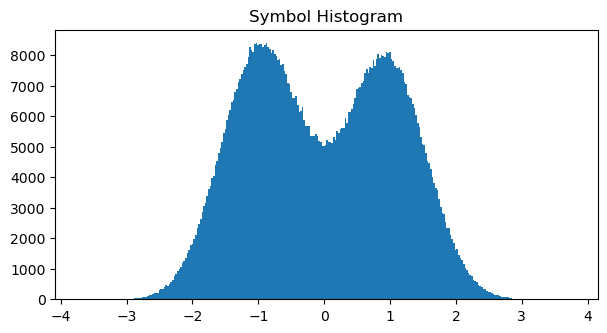

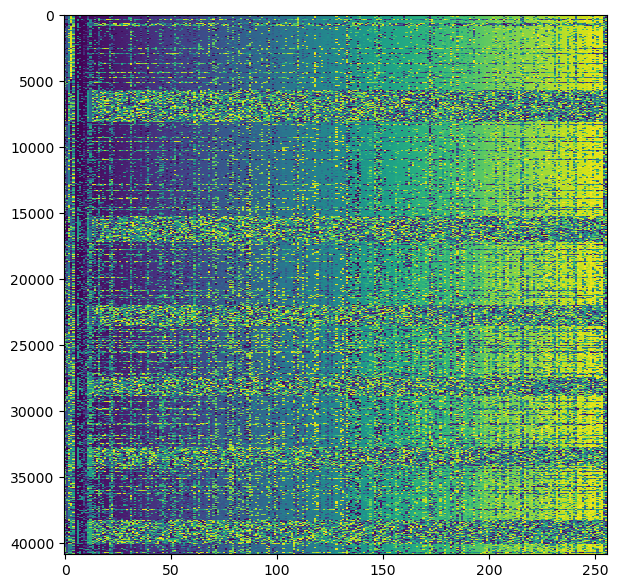

In [8]:
analysis('orion_2022_11_30_19_39_43_soft_pdus.f32') # uncoded

CRC OK fraction: 0.0


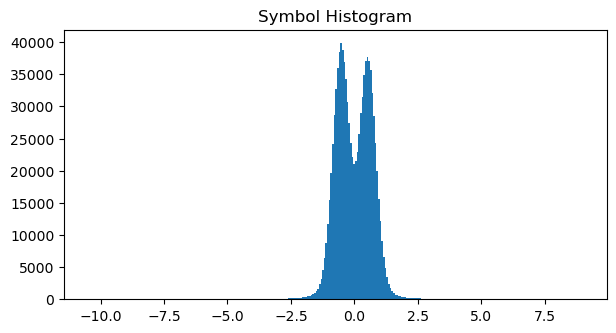

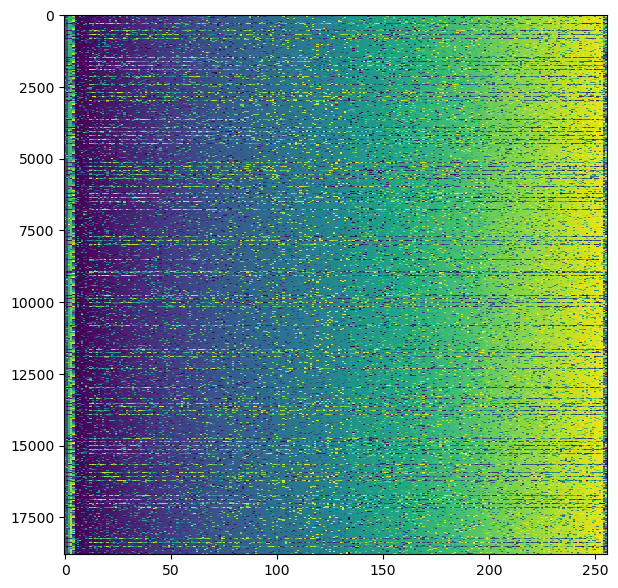

In [9]:
analysis('new/orion_2022_12_08_15_46_46_soft_pdus.f32') # uncoded OQPSK

CRC OK fraction: 0.012682308180088777


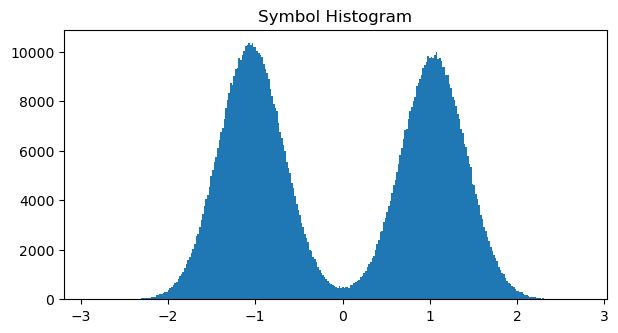

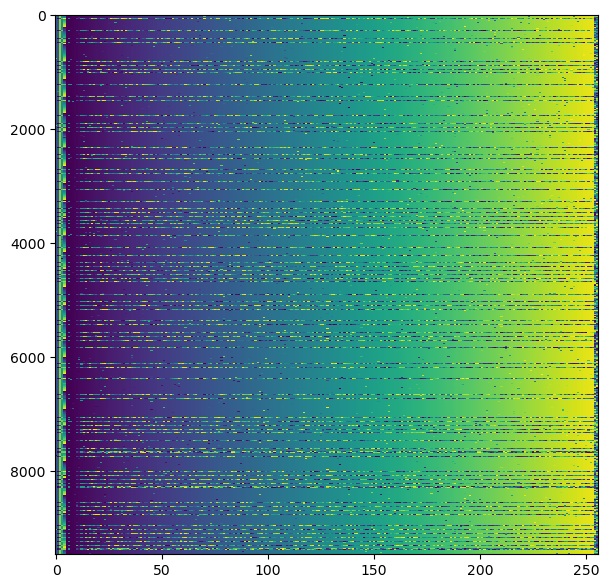

In [10]:
analysis('new/orion_2022_12_08_16_37_42_soft_pdus.f32') # uncoded

CRC OK fraction: 0.9740095087163233


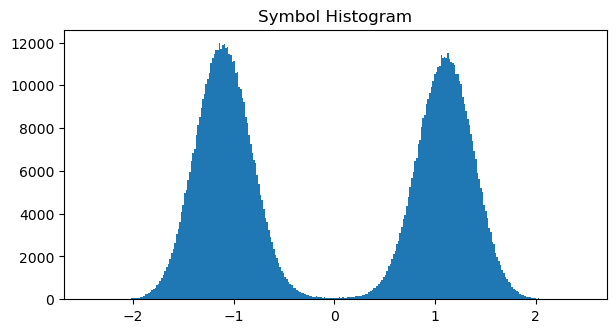

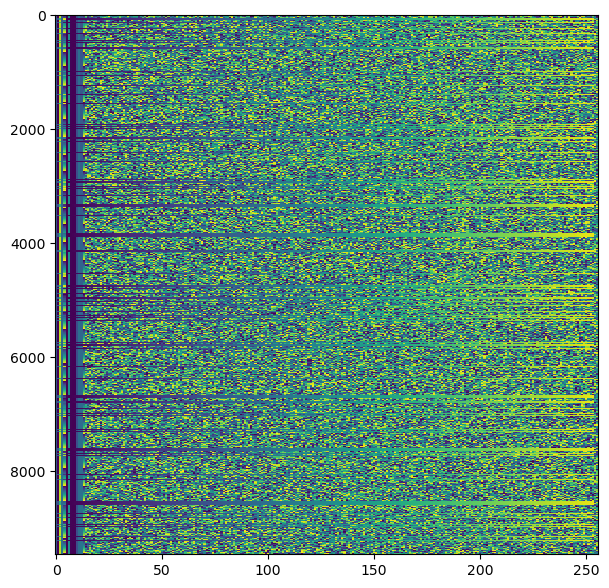

In [11]:
analysis('new/orion_2022_12_10_21_01_30_soft_pdus.f32') # uncoded